Hi, I am **Aman Yadav**, currently pursuing a Master’s degree in **Life Science Informatics at the Technical University of Deggendorf**, Germany. This project was undertaken independently as a personal hobby and is not associated with my university coursework.

In this project, I utilized the **Breast Cancer Wisconsin (Diagnostic) Dataset** (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data) to cluster cancer cells using the **K-means algorithm**. The goal was to group the cancer cells based on various features of the cell nuclei. This project demonstrates the basic use of the K-means machine learning model (**an unsupervised learning technique**) to cluster unknown data.



**About the dataset**
The Breast Cancer Wisconsin (Diagnostic) Data Set provides detailed measurements of cell nuclei from breast cancer biopsies, making it a valuable resource for studying cancer detection and diagnosis using machine learning techniques. The features are designed to capture various aspects of cell morphology, which can be analyzed to understand and predict cancer characteristics.

**Source**: The dataset is available on Kaggle and was originally collected by Dr. William H. Wolberg from the University of Wisconsin Hospitals, Madison.


**Purpose**: It is used for analyzing and predicting the type of breast cancer (benign or malignant) based on cell nucleus measurements.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
#loading the dataset

df = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")
pd.set_option('display.max_columns', None)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


As you can see out datra set contains 33 columns therfore we have 33 features to train our model for clustering
lets see little more information about the dataset so we can get an ideas if it is fit to use or not 

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


The K-means model is highly sensitive to the scale of the features because it relies on calculating distances between data points. Therefore, it is crucial to standardize or normalize the features before applying the K-means algorithm. This ensures that all features contribute equally to the distance calculations and prevents features with larger scales from disproportionately influencing the clustering results.

In our dataset, which consists of 33 columns (features), we performed standardization on only a subset of features deemed most relevant for clustering. Standardizing all features might not always be necessary or practical, especially if some features are not directly useful for the clustering objective. By focusing on standardizing only those features that are most suitable for clustering, we ensure that the model effectively uses the most informative attributes while maintaining computational efficiency.

In [5]:
#transfroming data into scalar fromat 
scaler = StandardScaler()
df[["radius_mean_tf" , "texture_mean_tf" , "perimeter_mean_tf", "area_mean_tf", "smoothness_mean_tf", "compactness_mean_tf", "concavity_mean_tf"	,"concave points_mean_tf",
    "symmetry_mean_tf" , "fractal_dimension_mean_tf"]] = scaler.fit_transform(df[["radius_mean" , "texture_mean" , "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"	,"concave points_mean",
    "symmetry_mean" , "fractal_dimension_mean"]])

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,radius_mean_tf,texture_mean_tf,perimeter_mean_tf,area_mean_tf,smoothness_mean_tf,compactness_mean_tf,concavity_mean_tf,concave points_mean_tf,symmetry_mean_tf,fractal_dimension_mean_tf
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


The elbow method is a popular technique for determining the optimal number of clusters 𝑘 in K-means clustering. The method involves running K-means with different values of k and evaluating the clustering performance to identify the best number of clusters.

By using the elbow method, you can systematically determine a suitable number of clusters for K-means clustering, balancing between overfitting (too many clusters) and underfitting (too few clusters). Therfore in the below code, I took a range of K from 1 to 10 to identify the best fit.

Elbow Shape: Look for a clear bend or "elbow" in the plot where the rate of decrease in WCSS slows down.

C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

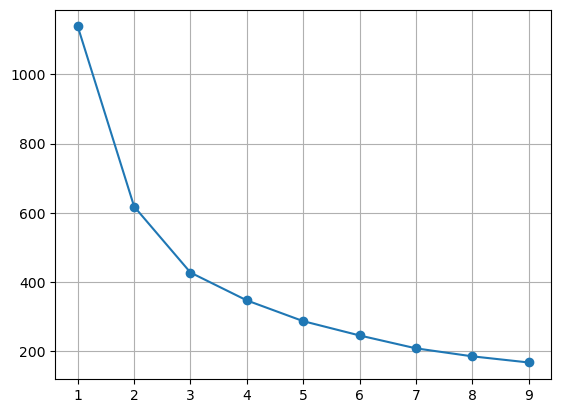

In [6]:
#optimal k mean

def diff_k_means (data, k_mean_range):
    mean =[]
    inertia =[]
    for i in range(1,k_mean_range):
        kmeans = KMeans(n_clusters= i)
        kmeans.fit(data)
        mean.append(i)
        inertia.append(kmeans.inertia_)
    plt.plot (mean ,inertia, "o-")
    plt.grid()
    plt.show()

diff_k_means(df[["radius_mean_tf" , "texture_mean_tf" ]] , 10)
    

So now we know the perfect K to chooes therfore we can go ahead with the model training. I have only choosen two main features which are
**radius_mean_tf** and **texture_mean_tf**. but we can chooes any feature we think is important. according to me these two features may play a significant role in identifying cancerous cells.

**The mean of distances from the center to points on the perimeter of the tumor. This feature is indicative of the overall size of the tumor.
more size can significantly differentiate between types of tumors and is a key factor in distinguishing between benign and malignant cases. Variability in tumor size provides useful clustering information.**

**The mean of the standard deviation of gray-scale values in the tumor image. This feature captures the texture of the tumor's surface.
Texture can be an important distinguishing feature because malignant tumors often have different textural characteristics compared to benign tumors. The variability in texture can help in identifying clusters with distinct patterns.**



All the clusters are assinged in the datasheet under a new colomn called **"k_mean_pred"**

In [21]:
# applying the model
kmean = KMeans(n_clusters= 2)
kmean.fit(df[["radius_mean_tf" , "texture_mean_tf" ]])
df["k_mean_pred"] = kmean.labels_

df["colorcode"] = np.where(df["diagnosis"] == "M", "red", "blue")

C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


The scatter plot from matplotlib will help us to visualize the clusters 

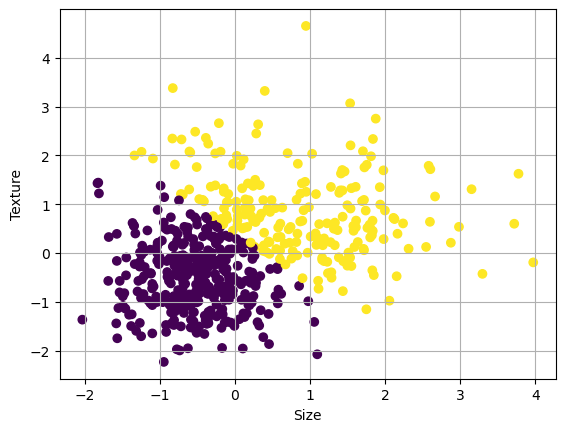

In [22]:
plt.scatter(df["radius_mean_tf"], df["texture_mean_tf"], c=df["k_mean_pred"])
plt.ylabel("Texture")
plt.xlabel("Size")
plt.grid()

In this graph, we can observe the predicted clusters formed by the K-means model based on the size and texture of the data points. This clustering technique proves to be quite effective in distinguishing between two distinct groups of cells, allowing us to efficiently classify them as either malignant or benign tumors. It is important to note that the scales of the x-axis and y-axis appear different because the graph was plotted using standardized values, rather than the actual values from the original dataset. This standardization process ensures that features with different units or scales are brought to a common scale, making the clustering results more meaningful and comparable.

Ideally, our dataset already contains classified groups of malignant and benign tumors, which allows us to evaluate the accuracy of the K-means model in this specific scenario. By comparing the predicted clusters from the K-means model with the actual classifications provided in the dataset, we can determine how well the model performs in distinguishing between the two types of tumors. The graph below provides a visual comparison between the results of our machine learning model and the actual classification, giving us valuable insight into the model's effectiveness and accuracy.

Text(0.5, 1.0, 'K-mean model predictions')

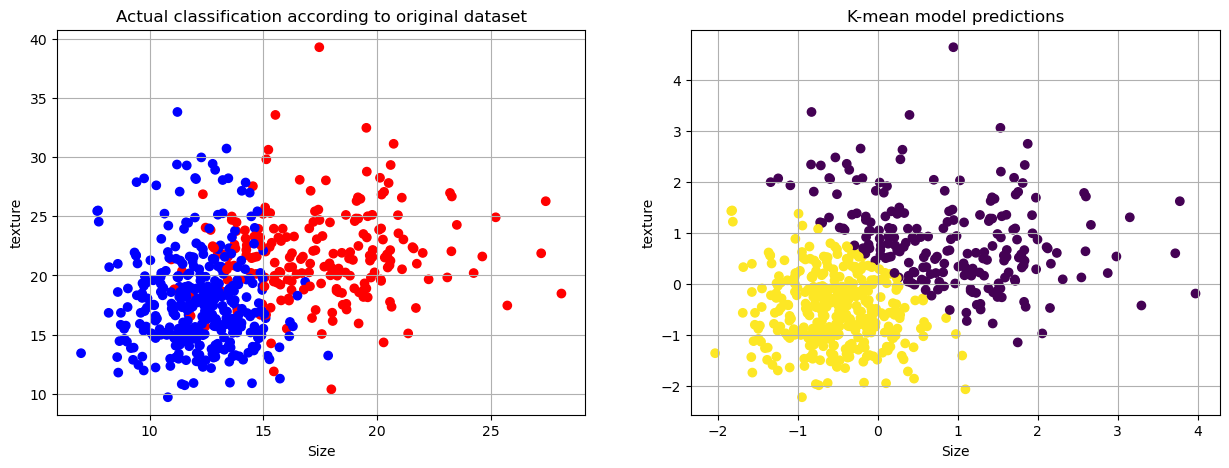

In [20]:
fig ,axs = plt.subplots(nrows = 1 , ncols = 2, figsize =(15 , 5))

axs[0].scatter(df["radius_mean"], df ["texture_mean"], c=df["colorcode"])
axs[0].grid()
axs[0].set_ylabel("texture")
axs[0].set_xlabel("Size")
axs[0].set_title("Actual classification according to original dataset")

axs[1].scatter(df["radius_mean_tf"], df["texture_mean_tf"], c=df["k_mean_pred"])
axs[1].grid()
axs[1].set_ylabel("texture")
axs[1].set_xlabel("Size")
axs[1].set_title("K-mean model predictions")

In [23]:
for k in range (1,10):
    kmean = KMeans(n_clusters= k)
    kmean.fit(df[["radius_mean_tf", "texture_mean_tf" ]])
    df["k_mean_{}".format(k)] = kmean.labels_


C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

Below are examples of how the scatter plots would appear with different values of K in our model. The number of clusters, represented by K, can be adjusted based on the specific requirements of the analysis or to enhance the model's accuracy. In our current example, we used **K = 2** to differentiate between two groups; however, the value of K can be modified depending on the desired number of classifications and the characteristics of the model. By experimenting with different values of K, we can identify the optimal number of clusters that best represents the underlying patterns in the data.



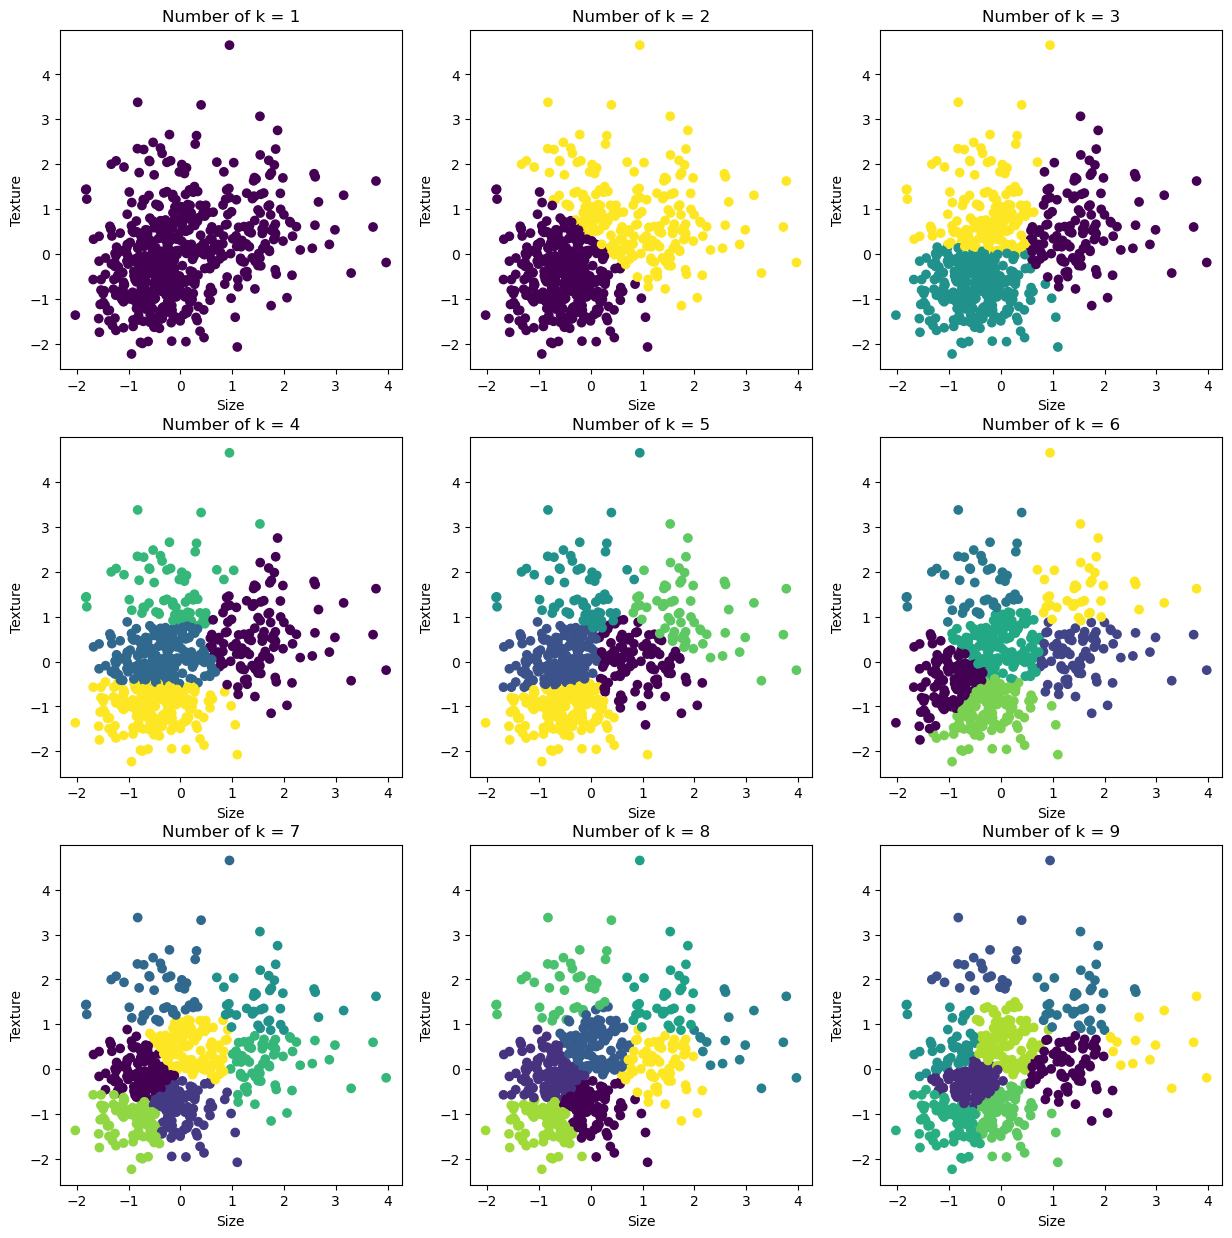

In [81]:
fig ,axs = plt.subplots(nrows = 3 , ncols = 3, figsize =(15 , 15))
for i, ax in enumerate(fig.axes, start =1):
    ax.scatter(df["radius_mean_tf" ], df ["texture_mean_tf"], c=df["k_mean_{}".format(i)])
    ax.set_title("Number of k = {}".format(i))
    ax.set_ylabel("Texture")
    ax.set_xlabel("Size")

**Conclusion**


The K-means clustering model applied to this dataset effectively groups cells based on various features, providing a robust method for distinguishing between different types of cancerous cells. In this analysis, we used size and texture as the primary features for clustering, but other features could also be utilized depending on the specific requirements of the study or the type of analysis being conducted. By analyzing the **Elbow graph**, we determined that the optimal number of clusters is **K = 2**, which aligns with our goal of distinguishing between benign and malignant tumors. As a result, the model successfully formed two distinct clusters—one representing **benign tumors** and the other representing **malignant tumors**. These clusters can be visualized in the graphs above, illustrating the model's capability to classify and separate the cells effectively based on their **malignancy**.

**In summary, the main objective of this project was to practice and refine my machine learning skills by working with complex data structures to derive meaningful insights. This exercise demonstrates the effectiveness of K-means clustering in identifying patterns in medical data, which could potentially aid in the diagnosis and understanding of cancerous cell behavior**.